In [9]:
!pip install ipympl

In [10]:
%matplotlib ipympl

from scipy import integrate as i
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [11]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [12]:
mu=39.4234021
a=0.38709893
alpha=1.09778201E-8
e=0.20563069
dt=np.linspace(0,10,1000)

r=[a*(1 + e),0,0,np.sqrt((mu/a)*((1-e)/(1+e)))]

def func(t,r):
  x, y, vx, vy = r
  norm = np.sqrt(x**2 + y**2)
  ax = - x*mu/norm**2 * (1 - (alpha/norm))
  ay = - y*mu/norm**2 * (1 - (alpha/norm))
  return [vx, vy, ax, ay]


l=i.solve_ivp(func,t_span=[0,10],y0=r,t_eval=dt)
x,y,vx,vy=l.y

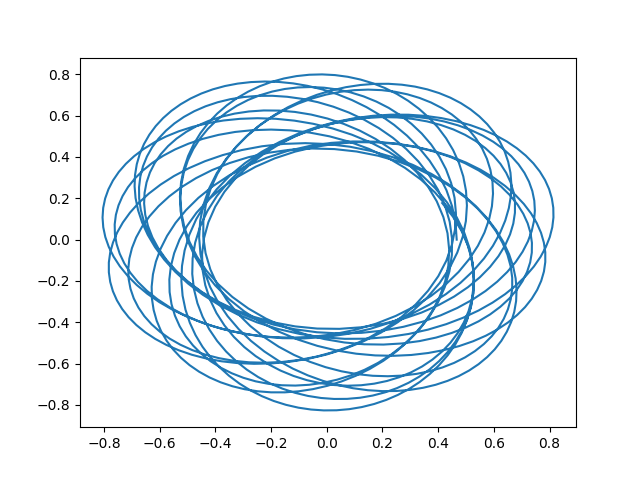

In [13]:
fig1=plt.figure()
aax=fig1.add_subplot(111)
aax.plot(x,y)

Puntos azules: orbita de mercurio con el factor relativista original.
Puntos negros: orbita de mercurio con el factor relativista alterado.


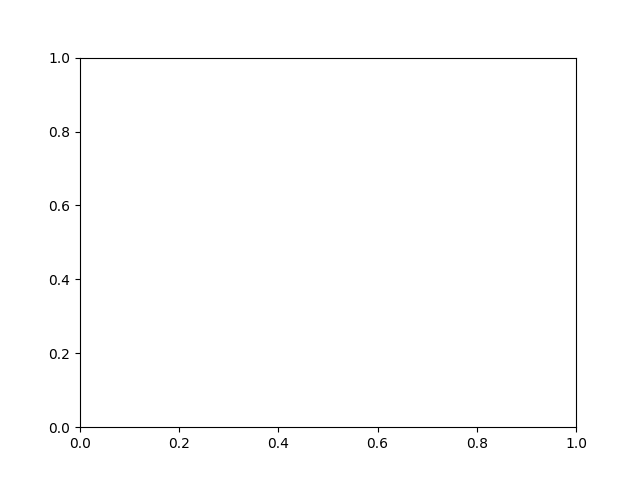

In [14]:
alpha2=10E-2
def func(t,r):
  x, y, vx, vy = r
  norm = np.sqrt(x**2 + y**2)
  ax = - x*mu/norm**2 * (1 - (alpha2/norm))
  ay = - y*mu/norm**2 * (1 - (alpha2/norm))
  return [vx, vy, ax, ay]


l2=i.solve_ivp(func,t_span=[0,10],y0=r,t_eval=dt)
x2,y2,vx2,vy2=l2.y


fig=plt.figure()

ax=fig.add_subplot(111)

scale = 2
t1 = dt[::scale]
#-------------------------------------------------------------------------

def init():

  ax.clear()
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)



def Update(i):

    #init()
    X=x[i]
    Y=y[i]
    X2=x2[i]
    Y2=y2[i]

    cuadrado=plt.Circle((X,Y),radius=0.01,fill=True,label="mercurio")
    cuadrado2=plt.Circle((X2,Y2),radius=0.01,fill=True, color="k",label="mercurio2")
    sol=plt.Circle((0,0),radius=0.1,color="r",fill=True)
    ax.add_patch(sol)
    ax.add_patch(cuadrado)
    ax.add_patch(cuadrado2)





Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)
print("Puntos azules: orbita de mercurio con el factor relativista original.")
print("Puntos negros: orbita de mercurio con el factor relativista alterado.")

In [15]:
#Precesion orbita
p=np.zeros((0,1))
v=np.zeros((1,2))
temp=np.zeros((0,1))
for i in range(len(dt)):
    pos=np.array([x[i],y[i]])
    vel=np.array([vx[i],vy[i]])

    if np.isclose(pos@vel,0,atol=1e-1):
        p=np.append(p,np.arctan2(y[i],x[i]))
        temp=np.append(temp,dt[i])
        v=np.append(v,[pos],axis=0)

p=p/np.pi



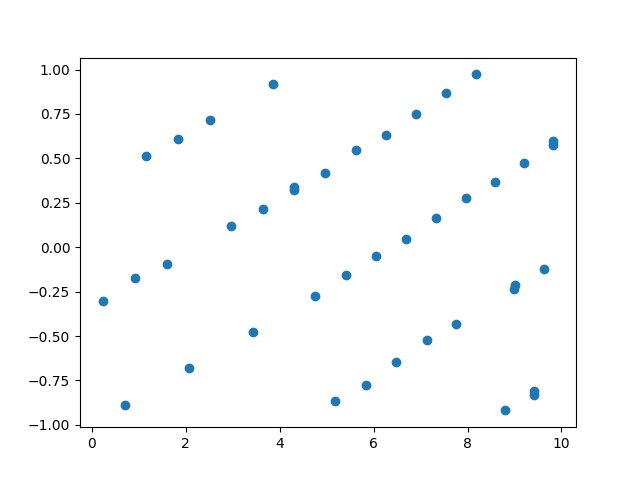

In [16]:
figfinal=plt.figure()
fi=figfinal.add_subplot(111)

for i in range(len(p)):
    if p[i]>0.5 :
        p[i]=p[i]-1
    elif p[i]<-0.5:
        p[i]=p[i]+1
    elif p[i]<0.5 and p[i]>0:
        p[i]=p[i]-1
    elif p[i]>-0.5 and p[i]<0:
        p[i]=p[i]+1

fi.scatter(temp[1:],p[1:])